In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cvxopt
import random
%matplotlib inline

In [3]:
#defining kernels
def Linear_kernel(X,Y):
    return np.dot(X,Y)

In [4]:
def Poly_kernel(X,Y,c=1,p=2):
    return (c + np.dot(X,Y))**p

In [5]:
#making the SVM class
class SVM(object):
    #constructor
    def __init__(self,kernel=Poly_kernel):
        self.kernel = kernel
    
    #fitting method
    def fit(self,X,Y):
        #Now we use the cvxopt to solve the quadratic programming problem of SVM
        #refer https://www.youtube.com/watch?v=_PwhiWxHK8o and https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf
        #for more information
        
        
        n_samples, n_features = X.shape
     
        #making a kernel matrix
        K=np.zeros((n_samples,n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i],X[j])
        
        #defining the parameters for the cvxopt.solvers.qp
        P=cvxopt.matrix(np.outer(Y,Y)*K)
        q=cvxopt.matrix(np.ones(n_samples)*-1)
        A=cvxopt.matrix(Y,(1,n_samples))
        b=cvxopt.matrix(0.0)
        G=cvxopt.matrix(np.diag(np.ones(n_samples)*-1))
        h=cvxopt.matrix(np.zeros(n_samples))
        
        #optimal a values
        solution=cvxopt.solvers.qp(P, q, G,h, A, b)
        a=np.ravel(solution['x'])
        
        #Support vectors are required to calculate intercept term 'b'
        #Support vectors have 'a' value != 0
        sv= (a > 1e-5)
        #Finding the support vectors of our model
        self.a= a[sv]
        self.Xsv= X[sv]
        self.Ysv= Y[sv]
        
        #Finding intercept term 'b' from the equation  
        
        n=len(self.a)
        ind=np.arange(len(a))[sv]
        p1=self.Ysv.sum()
        p2=0
        for i in range(n):
            p2=p2+ np.sum((self.a*self.Ysv*K[ind[i],sv]))
        
        self.b= (p1 - p2)/n
        '''
        self.b = 0
        ind=np.arange(len(a))[sv]
        for n in range(len(self.a)):
            self.b += self.Ysv[n]
            self.b -= np.sum(self.a * self.Ysv * K[ind[n],sv])
        self.b /= len(self.a)
'''
    def predict(self,X):
        #Returns the predicted value(1 or -1)  
        Ypr= np.zeros(len(X))
        for i in range(len(X)):
            s=0
            for a,ysv,xsv in zip(self.a,self.Ysv,self.Xsv):
                s=s+ a*ysv*self.kernel(X[i],xsv)
            Ypr[i] = s + self.b
        return np.sign(Ypr)
        
        
    


In [6]:
#Generating data
X=np.zeros((20,2))
Y=np.ones((20,1))
Y[0:10] = -1
for i in range(10):
    dummy=random.choice([-1,1]) #-ve class, x coordinate
    X[i,0]=(random.random()) * dummy #Noise
    dummy=random.choice([-1,1]) #-ve class, y coordinate
    X[i,1]=(random.random()) * dummy#Noise
    dummy=random.choice([-1,1]) #+ve class, x coordinate
    X[i+10,0]=random.uniform(1.5,3.0) * dummy #Noise
    dummy=random.choice([-1,1]) #+ve class, y coordinate
    X[i+10,1]=random.uniform(1.5,3.0) * dummy #Noise

In [7]:
clf=SVM(kernel=Poly_kernel)

In [8]:
clf.fit(X,Y.ravel())

     pcost       dcost       gap    pres   dres
 0: -6.4407e-01 -1.0001e+00  4e+01  6e+00  1e+00
 1: -1.1678e-01 -2.1656e-01  4e+00  5e-01  1e-01
 2:  3.0257e-03 -1.7050e-01  2e-01  6e-03  1e-03
 3: -4.0694e-02 -6.6538e-02  3e-02  4e-17  5e-16
 4: -4.7699e-02 -5.3753e-02  6e-03  1e-17  3e-16
 5: -5.1631e-02 -5.2994e-02  1e-03  1e-17  3e-16
 6: -5.2369e-02 -5.2409e-02  4e-05  1e-17  4e-16
 7: -5.2396e-02 -5.2397e-02  6e-07  2e-17  2e-16
 8: -5.2397e-02 -5.2397e-02  6e-09  2e-17  4e-16
Optimal solution found.


In [9]:
Ypr=clf.predict(X)

In [10]:
Ypr

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [11]:
Y

array([[-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [12]:
#Making the gridlines
xx, yy =np.meshgrid(np.arange(X[:,0].min() -1, X[:,0].max() +1, 0.2), np.arange(X[:,1].min()-1, X[:,1].max()+1, 0.2))

In [13]:
#Contour, given the x and y coordinate 
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])

In [14]:
Z=Z.reshape(xx.shape)

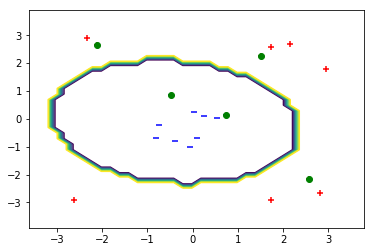

In [21]:
#Visualizing the decision boundary
plt.contour(xx,yy,Z)
plt.scatter(X[0:10,0],X[0:10,1],c='blue',marker='_')
plt.scatter(X[10:,0],X[10:,1],c='red', marker='+')
plt.scatter(clf.Xsv[:,0],clf.Xsv[:,1], c='green')  #The support vectors used to generate boundary